In [1]:
# coding: utf-8

import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature
import utils

In [2]:
img_list = utils.load_images('../input_image/parrington')
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

In [3]:
corner_r = feature.harris_corner(cylinder_img_list[0])
descriptors1, pos1 = feature.extract_description(cylinder_img_list[0], corner_r, kernel=5)

In [4]:
corner_r2 = feature.harris_corner(cylinder_img_list[1])
descriptors2, pos2 = feature.extract_description(cylinder_img_list[1], corner_r2, kernel=5)

In [5]:
mp = feature.matching(descriptors1, descriptors2, pos1, pos2)

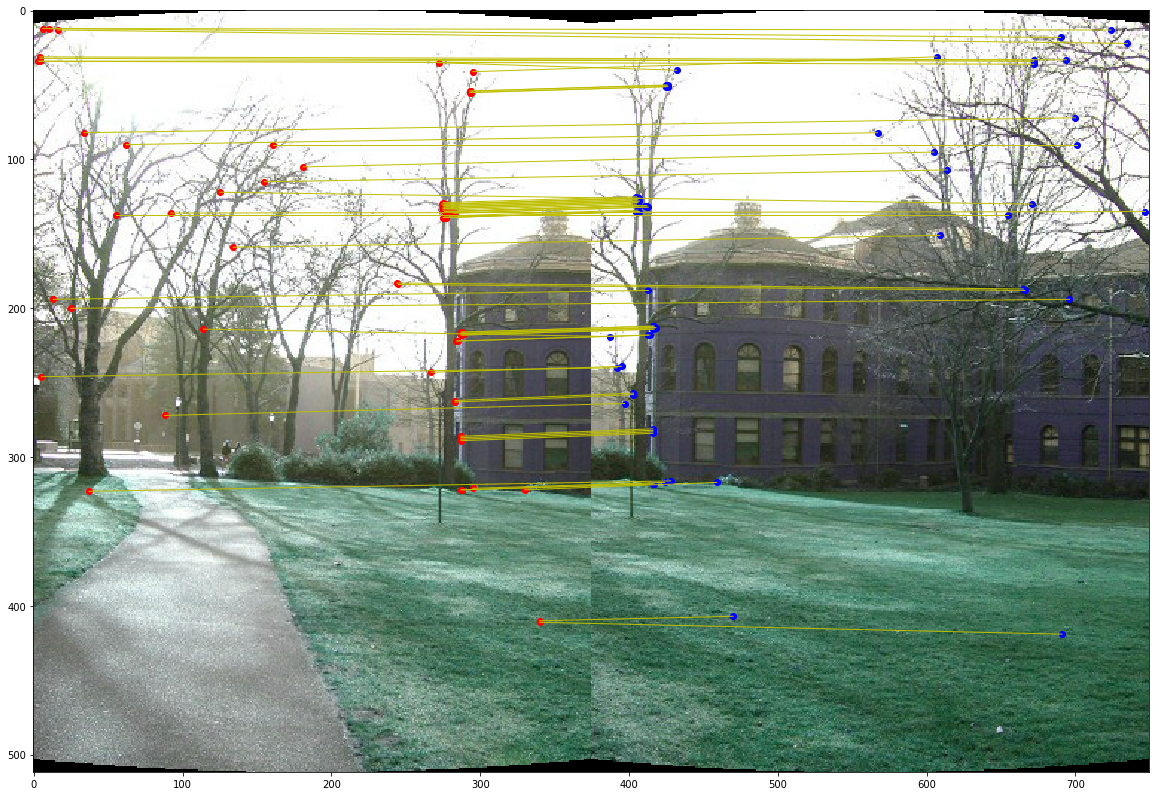

In [11]:
_, offset, _ = cylinder_img_list[1].shape
plt_img = np.concatenate((cylinder_img_list[1], cylinder_img_list[0]), axis=1)
plt.figure(figsize=(20,20))
plt.imshow(plt_img)
for i in range(len(mp)):
    plt.scatter(x=mp[i][1][1], y=mp[i][1][0], c='r')
    plt.plot([mp[i][1][1], offset+mp[i][0][1]], [mp[i][1][0], mp[i][0][0]], 'y-', lw=1)
    plt.scatter(x=offset+mp[i][0][1], y=mp[i][0][0], c='b')
plt.show()

In [67]:
# RANSAC
def RANSAC(img1, img2, matched_pairs):
    matched_pairs = np.asarray(matched_pairs)
    
    best_shift = []
    K = 5000
    threshold_distance = 20
    
    max_inliner = 0
    for k in range(K):
        
        # Random pick a pair of matched feature
        random_idx = int(np.random.random_sample()*len(matched_pairs))
        sample = matched_pairs[random_idx]
        
        # fit the warp model
        shift = sample[1] - sample[0]
        #print(sample)
        #print(shift)
        
        # calculate inliner points
        shifted = matched_pairs[:,1] - shift
        difference = matched_pairs[:,0] - shifted
        
        inliner = 0
        for diff in difference:
            if (diff**2).sum()**0.5 < threshold_distance:
                inliner = inliner + 1
        
        if inliner > max_inliner:
            max_inliner = inliner
            best_shift = shift
        
    return best_shift
        #print(matched_pairs)
        #print(shifted)
        #print(diff)

In [68]:
shift = RANSAC(cylinder_img_list[0], cylinder_img_list[1], mp)

In [69]:
a=np.array([1,5])
print(a**2)
(a**2).sum()**0.5
shift

[ 1 25]


array([  4, 245])

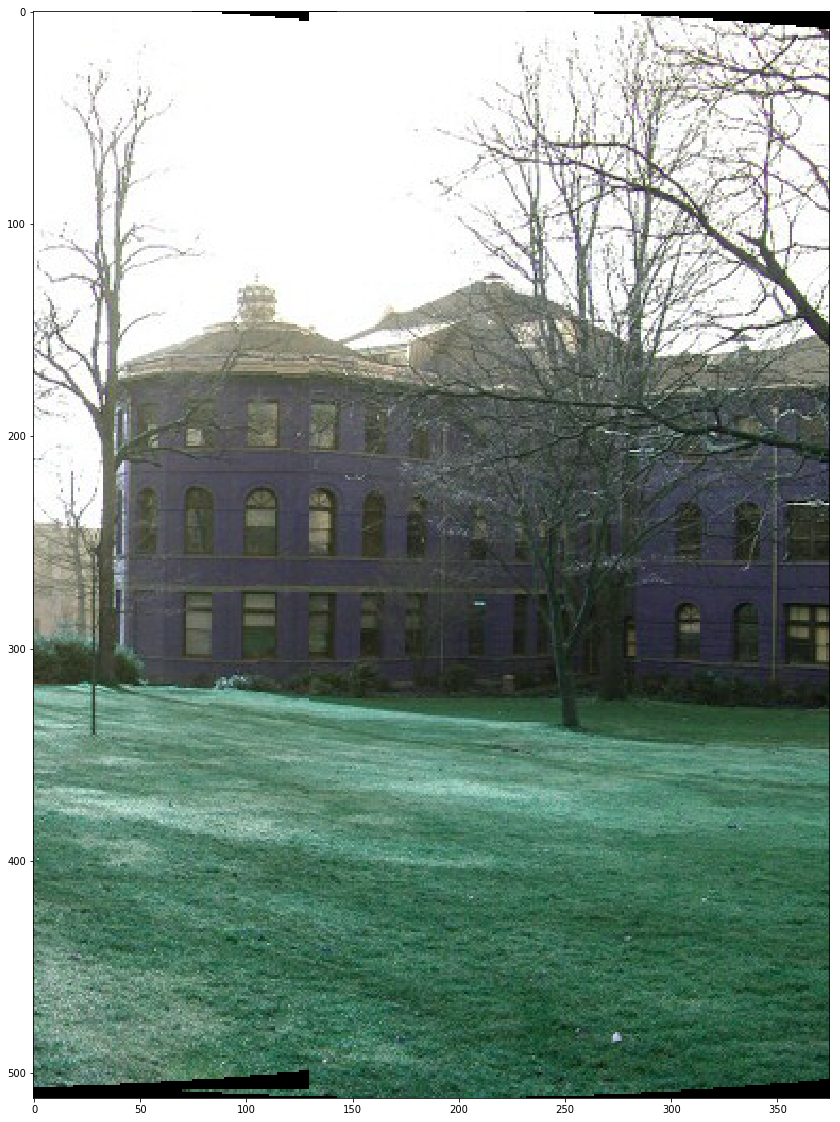

In [70]:
h, w, c = cylinder_img_list[0].shape
blend = np.zeros(shape=(h+abs(shift[0]),w+abs(shift[1]),c), dtype=np.uint8)

#if shift[0] > 0:
    # draw img2 first, shift img1

plt_img = cylinder_img_list[0].copy()
h, w, _ = cylinder_img_list[1].shape
for y in range(h):
    for x in range(w):
        if y-shift[0]>=0 and x-shift[1]>=0:
            plt_img[y-shift[0]][x-shift[1]] = cylinder_img_list[1][y][x]

plt.figure(figsize=(20,20))
plt.imshow(plt_img)
plt.show()

In [58]:
cv2.imwrite('0.jpg', cylinder_img_list[0])
cv2.imwrite('1.jpg', cylinder_img_list[1])

True